In [1]:
path = r"C:\Users\Rohan\Pictures\rohan\csv. file\Thecleverprogrammer.csv"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv(path)
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [3]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


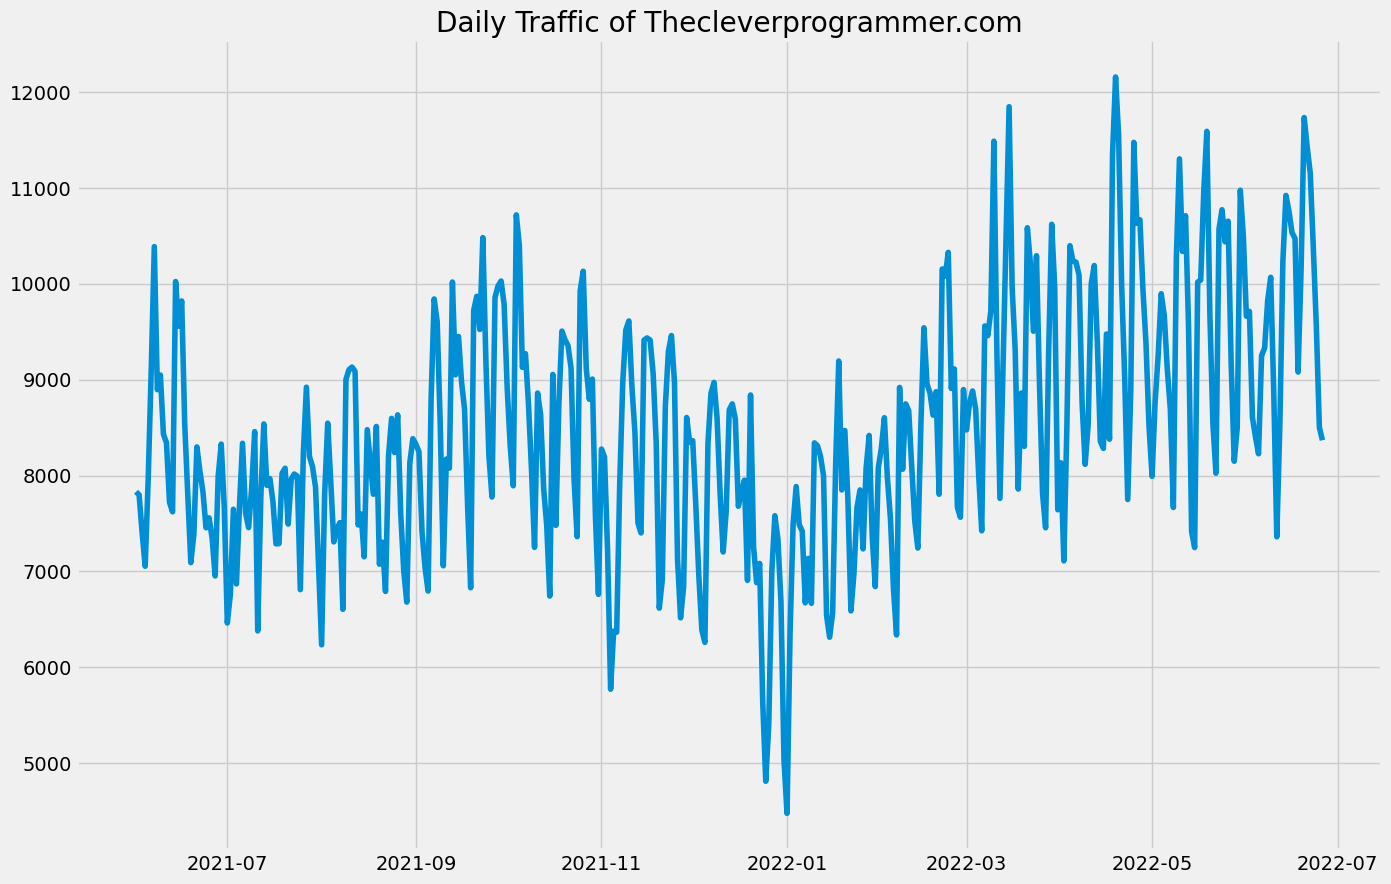

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

In [5]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

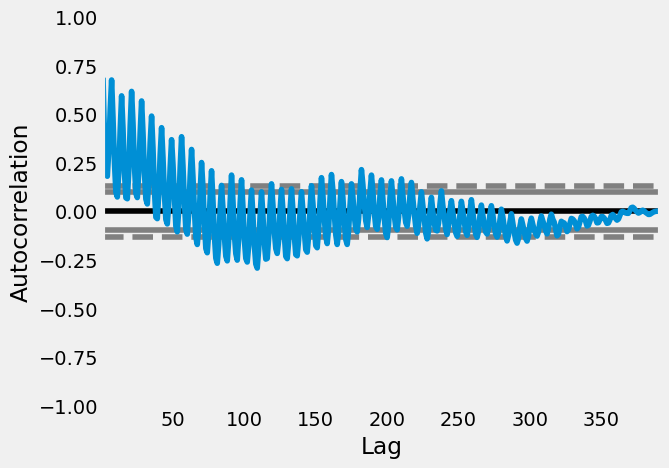

In [6]:
pd.plotting.autocorrelation_plot(data["Views"])

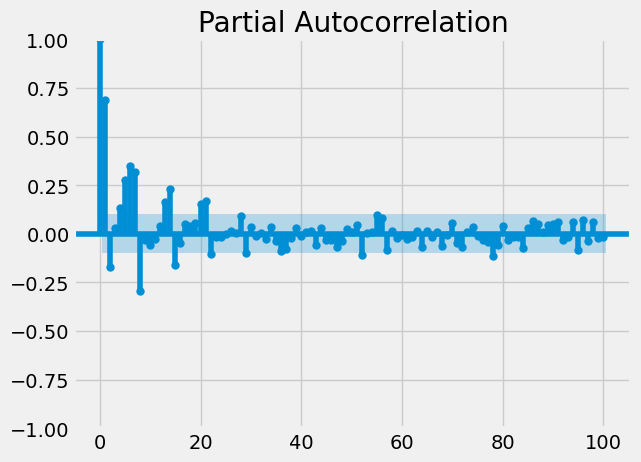

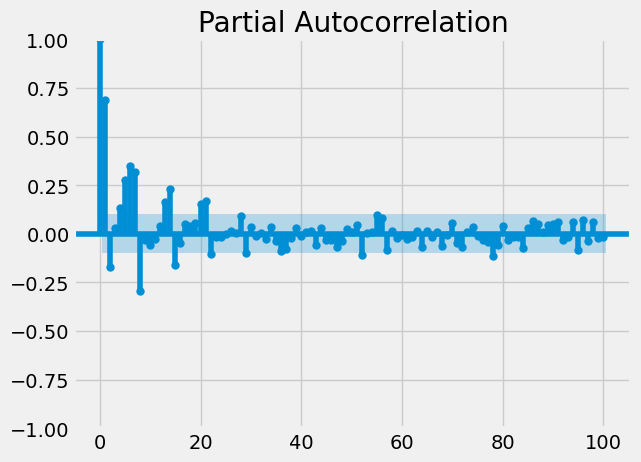

In [7]:
plot_pacf(data["Views"], lags = 100)

In [8]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\Rohan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Rohan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.157
Date:                            Fri, 05 Apr 2024   AIC                           6228.314
Time:                                    01:14:39   BIC                           6287.338
Sample:                                         0   HQIC                          6251.740
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8061      0.131      6.166      0.000       0.550       1.062
ar.L2         -0.7975      0.137   

In [9]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9803.869280
392    10758.234590
393    10708.012329
394     9830.321690
395     8805.480639
396     8256.804662
397     8876.666897
398     9661.892377
399    10254.634465
400    10552.228055
401     9803.524768
402     9320.371552
403     9004.316089
404     8991.834448
405    10446.424528
406    10949.688063
407    10828.063223
408    10039.402114
409     9428.121216
410     8581.728227
411     9060.034386
412    10311.490232
413    10597.079590
414    10790.167539
415    10247.478340
416     9428.953311
417     9004.322799
418     9103.066381
419     9890.353073
420    10252.268955
421    10709.089164
422     9906.090914
423     9556.259682
424     8991.494034
425     8717.790253
426    10039.049775
427    10797.914772
428    10871.710418
429    10349.554575
430     9395.908855
431     8572.415715
432     8560.146972
433     9960.604583
434    10447.996226
435    10800.668634
436    10455.343858
437     9321.672243
438     9133.755765
439     9274.660334
440    10214.247248


<Axes: >

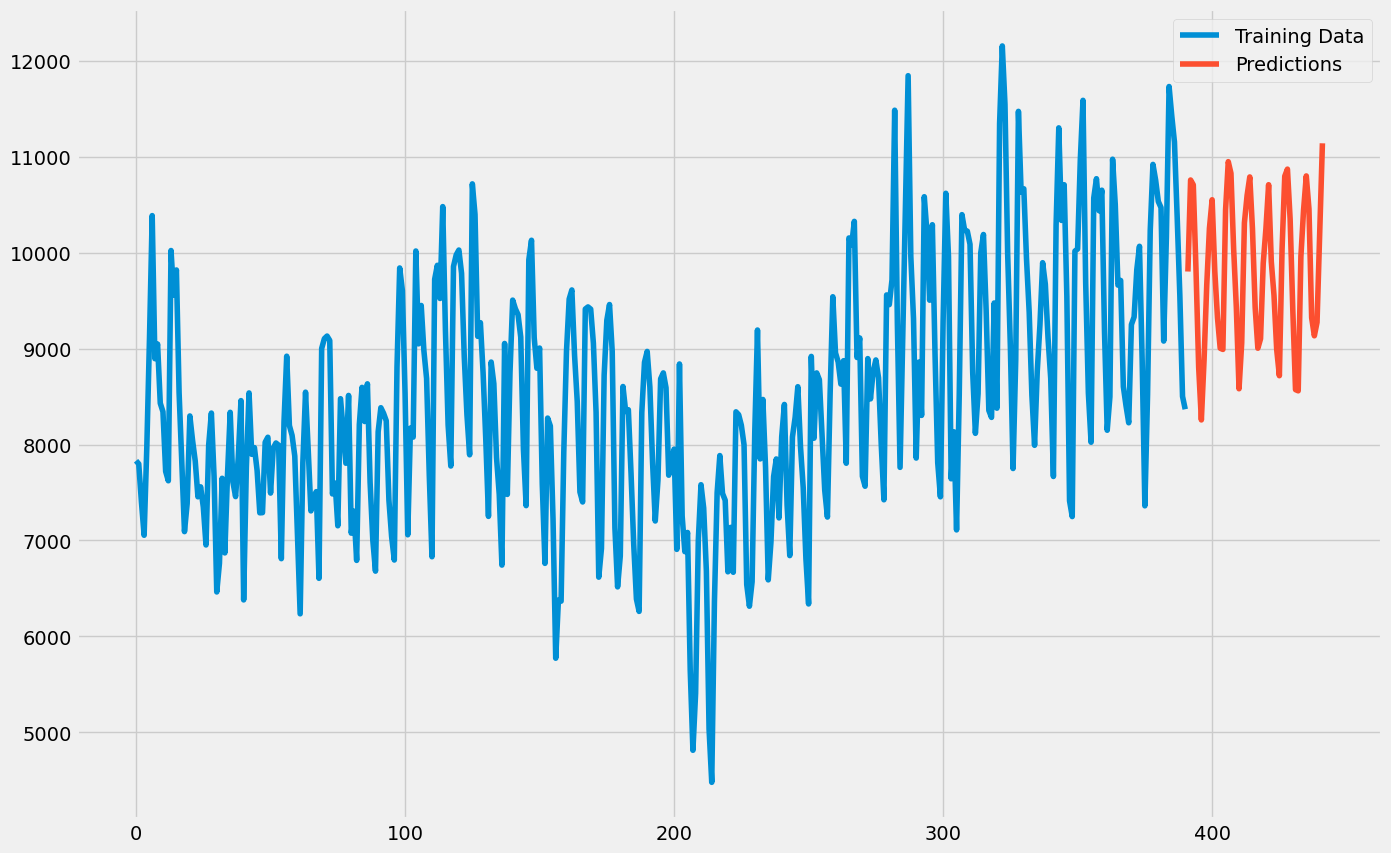

In [10]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")